- 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 data set이 필요
- **문서 군집화는 학습 data set이 필요 없는 비지도 학습 기반으로 동작**

> ### **Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기**

In [1]:
import pandas as pd
import glob, os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 700) # DataFrame의 열 너비 설정

path = '/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics'
# path 변수에 저장된 경로의 디렉토리에서 모든 .data 확장자를 가진 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합,
# 개별 파일들의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합
for file_ in all_files:
  # 개별 파일을 읽어서 DataFrame으로 생성
  df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')

  # 절대경로로 주어진 file 명을 가공.
  # 맨 마지막 .data 확장자도 제거
  filename_ = file_.split('\\')[-1]
  filename = filename_.split('.')[0]

  # 파일명 리스트와 파일 내용 리스트에 파일명과 파일 내용을 추가.
  filename_list.append(filename)
  opinion_text.append(df.to_string())

# 파일명 리스트와 파일 내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa..."
1,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/speed_garmin_nuvi_255W_gps,Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n0 I found myself not even looking at my car speedometer as I could easily see my current speed and the speed limit of my route at a glance .\n1 ...
2,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/food_holiday_inn_london,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...
3,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/price_holiday_inn_london,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ..."
4,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/navigation_amazon_kindle,"In fact, the entire navigation structure has been completely revised , I'm still getting used to it but it's a huge step forward .\n0 ..."


> **os.path.join(path, "*.data")을 사용하여 파일 경로를 조합하는 이유**
- 플랫폼 간 이식성: 파일 경로를 조작할 때 항상 / 또는 \를 사용하는 것은 플랫폼 간 이식성을 저하시킬 수 있습니다. 예를 들어, Windows에서는 \를 사용하지만 Unix 기반 시스템에서는 /를 사용합니다. os.path.join() 함수를 사용하면 이를 자동으로 처리하여 코드의 이식성을 높일 수 있습니다.

> **r'문자열'** : 특수 문자를 해석하지 않고 그대로 문자열로 처리하는 역할

- Python에서는 역슬래시(\\)가 이스케이프 문자로 사용되기 때문에, Windows 파일 경로와 같은 경우 \를 사용하는데, \n은 줄 바꿈 문자로 해석되고, \t는 탭 문자로 해석되기도 하여 원시 문자열(raw string) r을 사용하여 나타내면 예기치 않은 동작에 대비할 수 있다.


> **glob : 파일 경로 패턴 매칭을 위한 기능을 제공하는 클래스**

- 특정 디렉토리에 있는 파일들의 목록을 얻거나, 특정 패턴과 일치하는 파일들을 검색할 수 있습니다.
- 이는 파일 이름이나 경로를 기준으로 파일을 검색할 때 매우 유용합니다.

```python
import glob
### 현재 디렉토리에 있는 모든 .txt 파일 찾기
txt_files = glob.glob('*.txt')
### glob.glob() : 지정된 패턴과 일치하는 파일들의 리스트를 반환
```
-  glob은 와일드카드를 사용하여 파일을 검색하는데, 이것은 정규 표현식이 아니기 때문에 몇 가지 제한이 있을 수 있습니다.
- 만약 더 복잡한 파일 검색이 필요하다면 os 모듈과 os.path 모듈을 함께 사용하는 것이 좋을 수 있습니다.

> **와일드 카드 문자**
- *: 임의의 문자열과 일치합니다. 예를 들어, *.txt는 모든 .txt 확장자를 가진 파일과 일치합니다.
- ?: 한 문자와 일치합니다. 예를 들어, file?.txt는 file1.txt, file2.txt와 같은 파일과 일치합니다.


> **os** : 운영 체제와 상호 작용하기 위한 함수를 제공하는 모듈
- os.walk() 함수를 사용하면 특정 디렉토리와 하위 디렉토리를 반복하여 파일을 검색할 수 있습니다. 각 디렉토리에 대해 경로와 해당 디렉토리에 포함된 파일과 하위 디렉토리 목록을 제공합니다.
- os.path 모듈을 사용하여 파일 경로를 조작하고 검사할 수 있습니다. 예를 들어, 파일의 존재 여부를 확인하거나 파일 확장자를 추출하는 등의 작업을 수행할 수 있습니다.



```python
import os

# 특정 디렉토리 경로
directory = '/path/to/your/directory'

# 디렉토리와 하위 디렉토리 탐색
for root, dirs, files in os.walk(directory):
    # 현재 디렉토리 내의 파일 탐색
    for file in files:
        # 파일의 절대 경로 생성
        file_path = os.path.join(root, file)
        # 파일 경로 출력
        print(file_path)
```



전처리 단계에서 어근 변환 후 TF-IDF 형태로 피처 벡터화를 수행하는 것은 일반적으로 텍스트 분석에서 사용되는 표준적인 접근 방법입니다.

1. **어근 변환(Root Stemming)과 피처 벡터화(Vectorization)의 순서**:
   - 어근 변환은 단어의 기본 형태를 추출하여 단어 간의 유사성을 높이는 데 도움이 됩니다. 이는 단어의 다양한 형태가 동일한 의미를 나타내는 경우에 유용합니다.
   - TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 상대적인 중요성을 측정하는 데 사용되는 통계적 방법입니다. 단어의 빈도와 문서 내 빈도의 역수를 곱하여 계산됩니다.
   - 일반적으로 어근 변환 후에 TF-IDF를 수행합니다. 이는 변환된 어근에 대해 TF-IDF를 계산하여 문서의 중요한 단어를 더욱 효과적으로 나타낼 수 있기 때문입니다.

2. **어근 변환의 종류**:
   - 어근 변환에는 Stemming(어간 추출)과 Lemmatization(표제어 추출)이 있습니다. Stemming은 단어의 어근을 추출하는 간단한 규칙 기반 알고리즘을 사용하고, Lemmatization은 단어의 표제어를 찾기 위해 사전과 문법적 규칙을 사용합니다.
   - Lemmatization은 Stemming보다 정교하며 정확하지만 더 많은 계산 리소스가 필요합니다. 따라서 텍스트 데이터의 특성과 분석 목표에 따라 적절한 방법을 선택해야 합니다.


### **TfidfVectorizer의 tokenizer인자로 사용될 lemmatization 어근 변환 함수를 설정**

- TfidfVectorizer는 lemmatization 같은 어근 변환을 직접 지원하지 않기에, tokenizer 인자에 직접 만들어준 어근 변환 함수를 입력

In [2]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
# 구두점 문자를 제거하기 위해 사용할 사전, 구두점 문자를 키(key)로 사용하고 값(value)은 None으로 설정
# ord : 문자의 유니코드 코드 포인트를 반환하는 파이썬의 내장 함수
# string.punctuation : 텍스트에서 사용된 구두점(punctuation - 쉼표, 마침표, 물음표, 느낌표 등의 문자)의 문자열 list
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer 인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환.
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# 입력된 텍스트를 소문자로 변환한 후, 구두점을 제거하고 단어로 토큰화합니다.
# 그런 다음 토큰화된 결과를 LemTokens 함수에 전달하여 각 토큰의 어근을 찾고 반환합니다.

> nltk.word_tokenize() : 문자열을 단어 단위로 토큰화하여 단어들의 리스트를 반환

> translate() 메서드 : 문자열의 각 문자를 다른 문자로 변환하거나 제거하는 데 사용

- ex) 구두점을 제거하는 경우에 translate() 메서드를 사용할 수 있습니다. 구두점을 제거하기 위해 구두점을 빈 문자열로 매핑



```python
# 1. 변환 테이블
str.translate(table)
### table : 변환 테이블로, 각 문자의 유니코드 코드 포인트를 대응하는 변환 문자나 None으로 매핑한 딕셔너리 형태의 객체입니다.
### 예를 들어, {97: None, 98: 121}와 같은 형태입니다.

# 2. 삭제 테이블
str.translate(None, deletechars)
### deletechars : 이 문자열에 포함된 문자들은 문자열에서 삭제됩니다.
```

- 유니코드 코드 포인트를 사용하는 이유 중 하나는 파이썬이 문자열을 유니코드로 처리하기 때문입니다. 유니코드는 전 세계의 대부분의 문자를 포함하는 표준 문자 인코딩 방식이며, 파이썬의 문자열은 유니코드로 인코딩되어 있습니다. => 파이썬의 문자열 처리 방식에 기반한 것




In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

### **TF-IDF 기반 Vectorization 적용 후 KMeans 군집화 수행**

In [6]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [7]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...",4
1,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/speed_garmin_nuvi_255W_gps,Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n0 I found myself not even looking at my car speedometer as I could easily see my current speed and the speed limit of my route at a glance .\n1 ...,0
2,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/food_holiday_inn_london,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...,1
3,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/price_holiday_inn_london,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ...",3
4,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/navigation_amazon_kindle,"In fact, the entire navigation structure has been completely revised , I'm still getting used to it but it's a huge step forward .\n0 ...",4


In [8]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
44,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",0
41,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...,0
35,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/display_garmin_nuvi_255W_gps,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ...",0
10,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/satellite_garmin_nuvi_255W_gps,"It's fast to acquire satellites .\n0 If you've ever had a Brand X GPS take you on some strange route that adds 20 minutes to your trip, has you turn the wrong way down a one way road, tell you to turn AFTER you've passed the street, frequently loses the satellite signal, or has old maps missing streets, you know how important this stuff is .\n1 ...",0
1,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/speed_garmin_nuvi_255W_gps,Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n0 I found myself not even looking at my car speedometer as I could easily see my current speed and the speed limit of my route at a glance .\n1 ...,0
8,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/updates_garmin_nuvi_255W_gps,"Another thing to consider was that I paid $50 less for the 750 and it came with the FM transmitter cable and a USB cord to connect it to your computer for updates and downloads .\n0 update and reroute much _more_ quickly than my other GPS .\n1 UPDATE ON THIS , It finally turned out that to see the elevation contours at lowe...",0
38,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/voice_garmin_nuvi_255W_gps,The voice prompts and maps are wonderful especially when driving after dark .\n0 I also thought the the voice prompts of the 750 where more pleasant sounding than the 255w's .\n1 ...,0


In [9]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/food_holiday_inn_london,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...,1
20,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/food_swissotel_chicago,The food for our event was delicious .\n0 ...,1
22,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/free_bestwestern_hotel_sfo,The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n0 They also have a computer available with free internet which is a nice bonus but I didn't find that out till the day before we left but was still able to get on there to check our flight to Vegas the next day .\n1 ...,1
9,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/location_bestwestern_hotel_sfo,"Good Value good location , ideal choice .\n0 Great Location , Nice Rooms , Helpless Concierge\n1 ...",1
17,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/location_holiday_inn_london,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo...",1
27,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/parking_bestwestern_hotel_sfo,Parking was expensive but I think this is common for San Fran .\n0 there is a fee for parking but well worth it seeing no where to park if you do have a car .\n1 ...,1
6,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/service_bestwestern_hotel_sfo,"Both of us having worked in tourism for over 14 years were very disappointed at the level of service provided by this gentleman .\n0 The service was good, very friendly staff and we loved the free wine reception each night .\n1 ...",1
25,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/service_holiday_inn_london,"not customer, oriented hotelvery low service levelboor reception\n0 The room was quiet, clean, the bed and pillows were comfortable, and the serv...",1
34,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/service_swissotel_hotel_chicago,Mediocre room and service for a very extravagant price .\n0 ...,1
33,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/staff_bestwestern_hotel_sfo,Staff are friendl...,1


In [10]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
19,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",2
40,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",2
24,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,2
13,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/interior_honda_accord_2008,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,2
5,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/interior_toyota_camry_2007,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh...",2
21,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/mileage_honda_accord_2008,"It's quiet, get good gas mileage and looks clean inside and out .\n0 The mileage is great, and I've had to get used to stopping less for gas .\n1 Thought gas ...",2
15,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/performance_honda_accord_2008,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 Overall performance is good but comfort level is poor .\n2 ...",2
46,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/quality_toyota_camry_2007,I previously owned a Toyota 4Runner which had incredible build quality and reliability .\n0 I bought the Camry because of Toyota reliability and qua...,2
50,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/seats_honda_accord_2008,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ...",2
11,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/transmission_toyota_camry_2007,"After slowing down, transmission has to be kicked to speed up .\n0 ...",2


In [11]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
28,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",3
3,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/price_holiday_inn_london,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ...",3
16,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/room_holiday_inn_london,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...",3
29,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , H...",3
37,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/rooms_swissotel_chicago,"The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n0 The rooms look like they were just remodled and upgraded, there was an HD TV and a nice iHome docking station to put my iPod so I could set the alarm to wake up with my music instead of the radio .\n1 ...",3


In [12]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
39,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",4
32,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,4
7,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",4
12,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",4
0,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...",4
18,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",4
23,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/fonts_amazon_kindle,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",4
49,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/keyboard_netbook_1005ha,", I think the new keyboard rivals the great hp mini keyboards .\n0 Since the battery life difference is minimum, the only reason to upgrade would be to get the better keyboard .\n1 The keyboard is now as good as t...",4
4,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/navigation_amazon_kindle,"In fact, the entire navigation structure has been completely revised , I'm still getting used to it but it's a huge step forward .\n0 ...",4
31,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/performance_netbook_1005ha,"The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0 In Super Performance mode CPU, Z shows the bus speed to increase up to 169 .\n1 One...",4


In [13]:
from sklearn.cluster import KMeans

# 결과를 보면 전반적으로 군집 개수가 약간 많게 설정돼 있어서 세분화되어 군집화된 경향이 있다.
# 5개 -> 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...",0
23,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/fonts_amazon_kindle,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",0
32,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,0
35,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/display_garmin_nuvi_255W_gps,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ...",0
36,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/video_ipod_nano_8gb,"I bought the 8, gig Ipod Nano that has the built, in video camera .\n0 Itunes has an on, line store, where you may purchase and download music and videos which will install onto the ipod .\n1 ...",0
18,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",0
38,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/voice_garmin_nuvi_255W_gps,The voice prompts and maps are wonderful especially when driving after dark .\n0 I also thought the the voice prompts of the 750 where more pleasant sounding than the 255w's .\n1 ...,0
39,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",0
14,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/price_amazon_kindle,"If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0 lower overall price, with nice leather cover .\n1 ...",0
49,/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/keyboard_netbook_1005ha,", I think the new keyboard rivals the great hp mini keyboards .\n0 Since the battery life difference is minimum, the only reason to upgrade would be to get the better keyboard .\n1 The keyboard is now as good as t...",0


- cluster 0 : 호텔
- cluster 1 : 자동차
- cluster 2 : 전자기기

### **TF-IDF 기반 벡터화**

- 일반적으로 TF-IDF(Term Frequency-Inverse Document Frequency)로 벡터화된 텍스트를 사용하여 클러스터링을 수행하면 특정 단어의 수가 많이 나온 텍스트끼리 비슷한 군집으로 묶이는 경향이 있습니다.



## **군집별 핵심 단어 추출하기**

> KMeans 객체의 cluster_centers_ 속성

- 각 군집을 구성하는 단어 피처가 군집의 중심을 기준으로 얼마나 가깝게 위치해 있는지 =>  **각 feature는 피처 공간에서 군집의 중심점의 위치를 나타낸다**

- ex) cluster_cencters_[0,1] : 0번 군집에서 2번째 피처의 위치 값

In [14]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.00744565 0.         0.         ... 0.00802599 0.         0.        ]
 [0.00673279 0.00071193 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


In [15]:
type(cluster_centers)

numpy.ndarray

- 3개의 중심의 각 행의 배열(column) 값은 각 군집 내의 4611개 feature의 위치가 개별 중심과 얼마나 가까운 가를 상대 값으로 나타낸 것
- 0 ~ 1의 값을 가질 수 있고, 1에 가까울수록 중심과 가까운 값을 의미

> **argsort() [:,::-1]**

- argsort : 정렬된 요소의 인덱스를 반환 => , 원래 배열을 정렬하는 것이 아니라 정렬된 배열의 인덱스를 반환

-  argsort() 함수는 오름차순으로 정렬된 인덱스를 반환합니다. 따라서 원본 배열에서 가장 작은 값부터 가장 큰 값까지의 인덱스를 반환합니다.


- [:,::-1] : 다차원 배열에서 사용되는 슬라이싱(slicing) 표기법

- argsort() [:,::-1]를 사용하면 배열 내 값이 큰 순으로 정렬된 위치 인덱스 값을 반환

- ex) [:, 3:7:-1]은 모든 행에서 3번째 열부터 7번째 열 전까지의 열을 역순으로 선택

In [16]:
# 각 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features = 10):
  cluster_details = {} # 딕셔너리

  # cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값 변환
  # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1] # type : np.ndarray
  # 각 행의 값을 오름차순으로 정렬한 인덱스를 반환
  # 슬라이싱을 통해 모든 행을 선택하고, 각 행에 대해 열을 역순으로 선택

  # 개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
  for cluster_num in range(clusters_num):
    # 개별 군집별 정보를 담을 데이터 초기화.
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num
    # 특정 키에 있는 값을 설정 / 변경
    # cluster_details 딕셔너리의 내부 'cluster' 딕셔너리의 cluster 키에 해당하는 값으로 군집 번호(cluster_num)를 할당하는 것입니다.

    # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함.
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, : top_n_features]
    top_features = [feature_names[ind] for ind in top_feature_indexes]

    # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
    top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
    # DataFrame의 슬라이싱이 아닌 NumPy 배열의 슬라이싱을 사용하는 것이기 때문에 오류가 발생하지 않습니다.
# if DataFrame의 슬라이싱 => 행 추출하고 열 추출해야 함
### 1. selected_rows = cluster_model.cluster_centers_[cluster_num]
### 2. result = selected_rows[:, top_feature_indexes].tolist()

    # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_features_value'] = top_feature_values
    filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
    filenames = filenames.values.tolist()
    cluster_details[cluster_num]['filenames'] = filenames

  return cluster_details

# cluster_details : 개별 군집번호, 핵심 단어, 핵심단어 중심 위치 상대값, 파일명 속성 값 정보

> Dict 안의 Dict

1. `cluster_details[cluster_num]`: 이 부분은 `cluster_details` 딕셔너리에서 `cluster_num`이라는 키를 가진 부분을 선택하는 것입니다. 즉, 해당 군집 번호에 대한 정보를 담은 부분을 선택합니다.

2. `['cluster']`: 이는 선택된 군집 번호에 해당하는 딕셔너리의 내부 키(key) 중 하나입니다. 여기서는 'cluster'라는 키를 선택합니다.

3. `= cluster_num`: 이 부분은 선택된 딕셔너리의 'cluster' 키에 값을 할당하는 것입니다. 여기서 할당되는 값은 `cluster_num` 변수의 값입니다. 따라서 해당 군집 번호를 'cluster' 키에 대한 값으로 지정합니다.

결국 이 코드는 `cluster_details` 딕셔너리에 각 군집의 정보를 저장하는데, 각 군집 번호를 키로 사용하여 해당 군집에 대한 정보를 저장합니다. 이 과정에서 군집 번호를 키로 사용하여 해당 군집의 정보를 식별할 수 있게 됩니다.



```python
cluster_details = {
    0: {'cluster': 0, 'top_features': ['feature1', 'feature2'], 'filenames': ['file1.txt', 'file2.txt']},
    1: {'cluster': 1, 'top_features': ['feature3', 'feature4'], 'filenames': ['file3.txt', 'file4.txt']}
}
```



In [17]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [18]:
feature_names = tfidf_vect.get_feature_names_out()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df, feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'kindle', 'battery life', 'direction', 'voice', 'life', 'size', 'map']
Reviews 파일명 : ['/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/eyesight-issues_amazon_kindle', '/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/speed_garmin_nuvi_255W_gps', '/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/navigation_amazon_kindle', '/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/battery-life_netbook_1005ha', '/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/updates_garmin_nuvi_255W_gps', '/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/satellite_garmin_nuvi_255W_gps', '/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/buttons_amazon_kindle'

### KMeans Elbow 기법

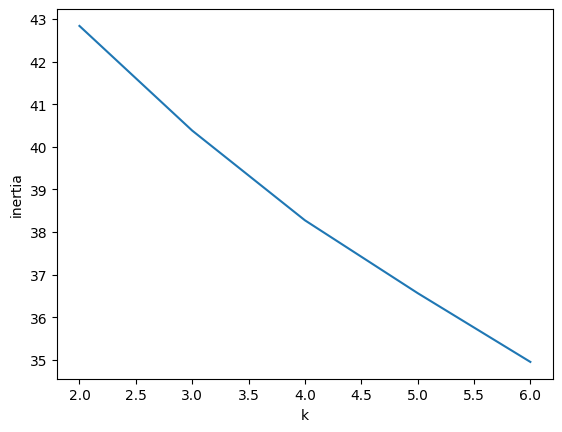

In [19]:
import matplotlib.pyplot as plt

inertia = []
for k in range(2,7):
  km_cluster = KMeans(n_clusters = k, max_iter = 10000, random_state = 0)
  km_cluster.fit(feature_vect)
  inertia.append(km_cluster.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# Inertia : 각 데이터 포인트와 해당 군집의 중심점 사이의 거리의 제곱합